In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Dados/train.csv", sep=",")
test = pd.read_csv("Dados/test.csv", sep=",")
gender = pd.read_csv("Dados/gender_submission.csv", sep=",")

In [3]:
###Verificando os dados

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
#Verificando dados e tipos de cada colunas

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
survived = train.groupby(['Survived']).size()
survived

Survived
0    549
1    342
dtype: int64

In [10]:
pclass = train.groupby(['Pclass']).size()
pclass

Pclass
1    216
2    184
3    491
dtype: int64

In [11]:
sex = train.groupby(['Sex']).size()
sex

Sex
female    314
male      577
dtype: int64

In [12]:
age = train.groupby(['Age']).size()
age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

In [13]:
sibSp = train.groupby(['SibSp']).size()
sibSp

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [14]:
parch = train.groupby(['Parch']).size()
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [15]:
embarked = train.groupby(['Embarked']).size()
embarked

Embarked
C    168
Q     77
S    644
dtype: int64

<Axes: xlabel='Survived'>

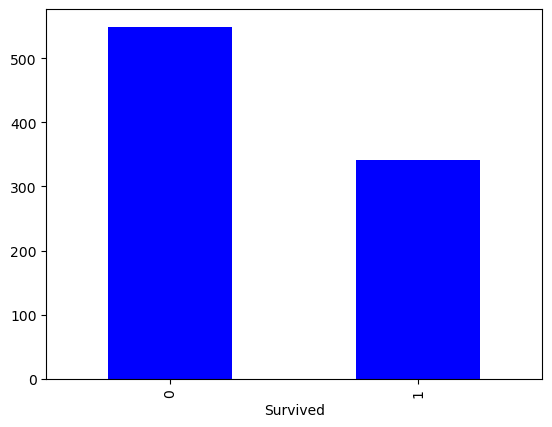

In [16]:
survived.plot.bar(color = 'blue')

In [17]:
#Fazendo graficos para comparar cada coluna com a coluna 'Survived'

<Axes: xlabel='Pclass'>

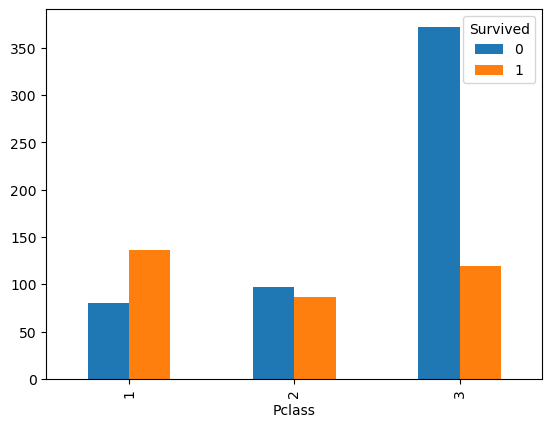

In [18]:
#Pclass
# poderia definir sem o for, usando apenas: ordem = [1, 2, 3] 
#mas em colunas com mais categorias pode ficar mais longo definir cada variavel
ordem = []
for key in pclass.keys(): ordem.append(key)
    
train.groupby('Survived')['Pclass'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Sex'>

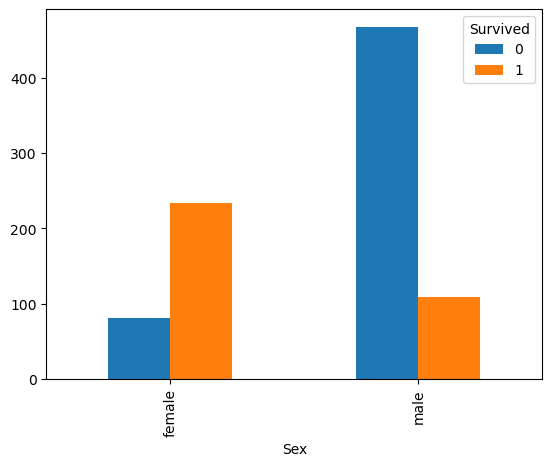

In [19]:
#Sex
ordem = []
for key in sex.keys(): ordem.append(key)

train.groupby('Survived')['Sex'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Count', ylabel='Age'>

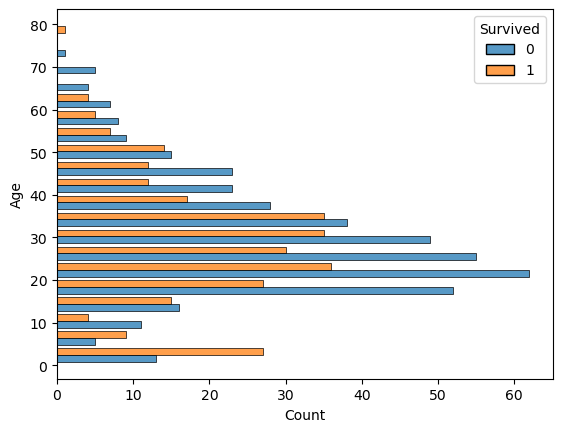

In [20]:
#Age
plot = sns.histplot(data=train, y="Age", hue="Survived", multiple="dodge", shrink=.8)

plot

<Axes: xlabel='SibSp'>

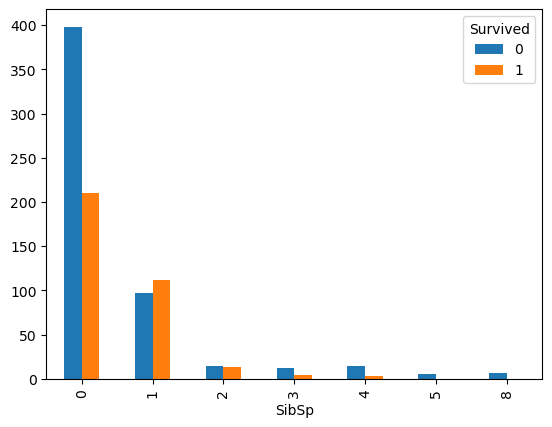

In [21]:
#SibSp
ordem = []
for key in sibSp.keys(): ordem.append(key)
    
train.groupby('Survived')['SibSp'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Parch'>

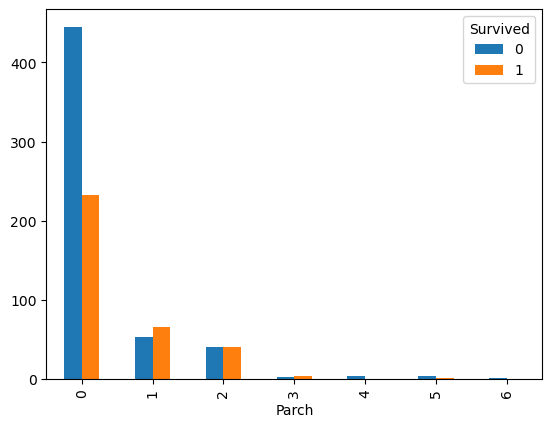

In [22]:
#Parch
ordem = []
for key in parch.keys(): ordem.append(key)
    
train.groupby('Survived')['Parch'].value_counts().unstack(0).loc[ordem].plot.bar()

<Axes: xlabel='Embarked'>

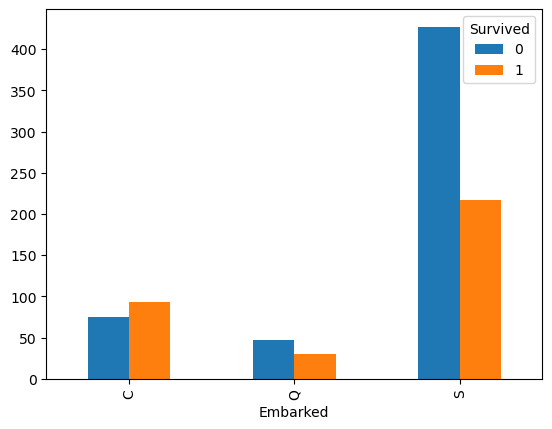

In [23]:
#Embarked
ordem = []
for key in embarked.keys(): ordem.append(key)
    
train.groupby('Survived')['Embarked'].value_counts().unstack(0).loc[ordem].plot.bar()